(-20, 20)

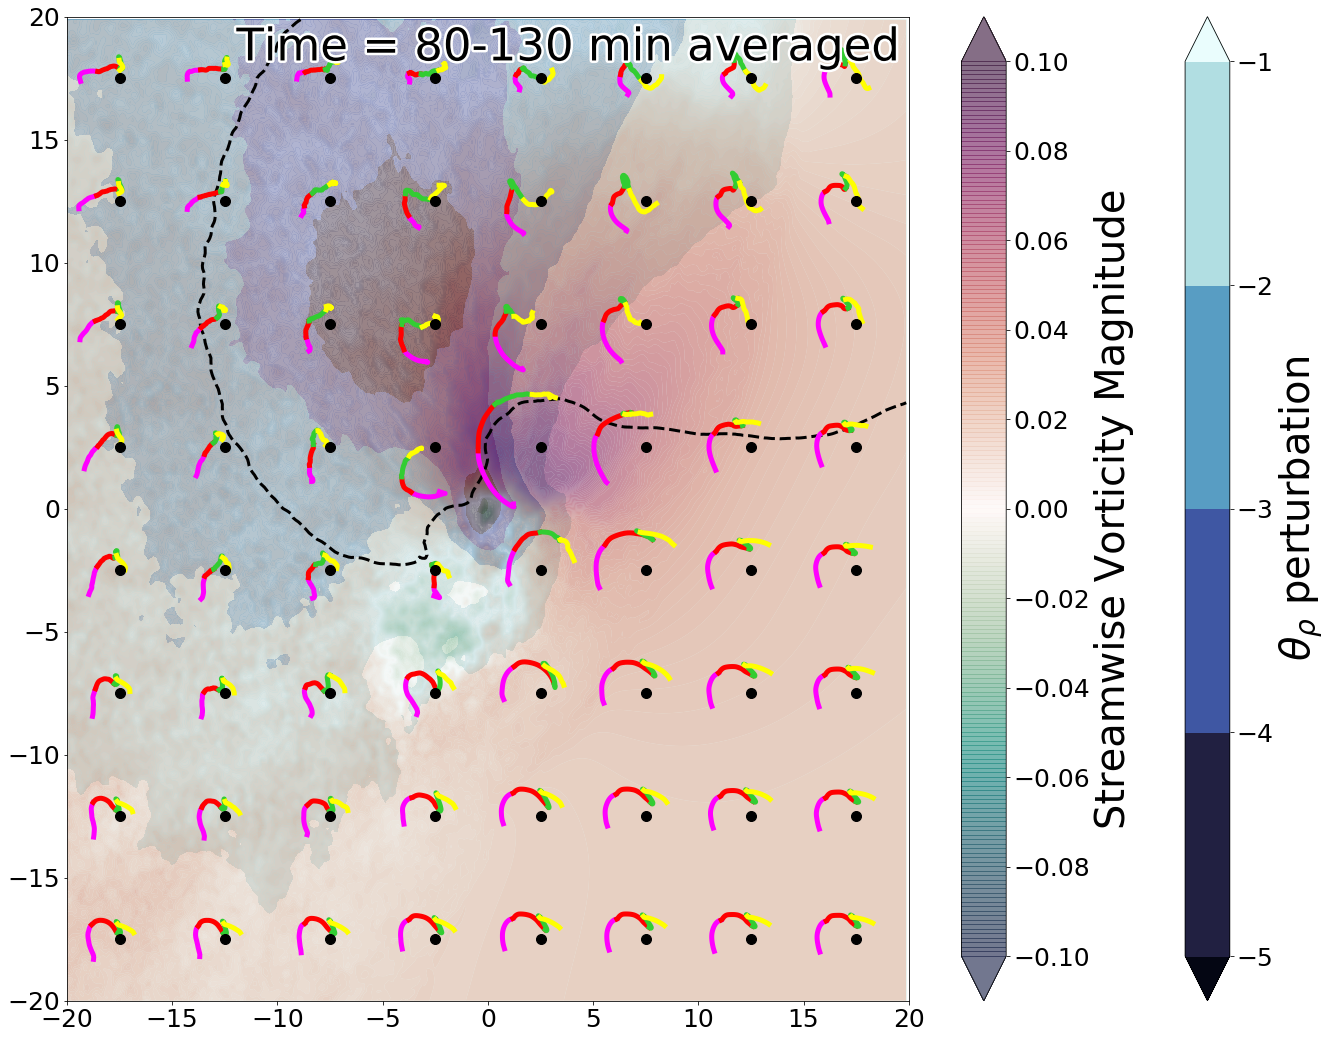

In [2]:
import numpy as np
import xarray as xr
import cmocean
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

def find_nearest(array, value):
    '''
    Function to find index of the array in which the value is closest to

    Parameters: array (array), value (number)
    Returns: index (int)

    Example: xind = find_nearest(x,5)
    '''

    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 60

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fils=f'/media/alex/SVC/mp0_orf_subset/subset80-130.nc'
ds = xr.open_dataset(fils)

x = ds['x']
y = ds['y']
z = ds['z']
X,Y = np.meshgrid(x,y)

ref =ds['dbz'].isel(nk=0)
u = ds['u']
v = ds['v']
svort =ds['svort']
trhopert = ds['trhopert']


fig, ax = plt.subplots(figsize=(20,15),facecolor='white')
svortlevels = [x / 1000. for x in range(-100, 101, 1)]

ax.contour(X, Y, ref, [40], colors='black',linewidths=3,linestyles='dashed')
tr=ax.contourf(X,Y,trhopert.isel(nk=find_nearest(z,0.25)),[-5,-4,-3,-2,-1],cmap=cmocean.cm.ice,extend='both')
cbar=plt.colorbar(tr, ticks=[-9,-8,-7,-6,-5,-4,-3,-2,-1,0])
cbar.set_label(r'$\theta_\rho$ perturbation')

sr=ax.contourf(X,Y,svort.isel(nk=find_nearest(z,0.25)),svortlevels,cmap=cmocean.cm.curl,extend='both',alpha=0.6, antialiased=True)
cbar=plt.colorbar(sr, ticks=[-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1])
cbar.set_label(r'Streamwise Vorticity Magnitude')

t1=ax.text(0.99, 0.99, 'Time = 80-130 min averaged', verticalalignment='top', horizontalalignment='right',transform=ax.transAxes, fontsize=45)
t1.set_path_effects([PathEffects.withStroke(linewidth=5,foreground='white')])

plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.tight_layout()

#resolution of points to draw hodographs, smaller resolution mean points will be closer together
res=40
scaling = 15

for i in x[int(res/2)::res].values:
    for j in y[int(res/2)::res].values:
        plt.plot((X[find_nearest(y,j),find_nearest(x,i)]-0.5+u[find_nearest(z,0):find_nearest(z,1),find_nearest(y,j),find_nearest(x,i)]/scaling),(Y[find_nearest(y,j),find_nearest(x,i)]-0.6+v[find_nearest(z,0):find_nearest(z,1),find_nearest(y,j),find_nearest(x,i)]/scaling),color='magenta',linewidth=5)
        plt.plot((X[find_nearest(y,j),find_nearest(x,i)]-0.5+u[find_nearest(z,1):find_nearest(z,3),find_nearest(y,j),find_nearest(x,i)]/scaling),(Y[find_nearest(y,j),find_nearest(x,i)]-0.6+v[find_nearest(z,1):find_nearest(z,3),find_nearest(y,j),find_nearest(x,i)]/scaling),color='red',linewidth=5)
        plt.plot((X[find_nearest(y,j),find_nearest(x,i)]-0.5+u[find_nearest(z,3):find_nearest(z,6),find_nearest(y,j),find_nearest(x,i)]/scaling),(Y[find_nearest(y,j),find_nearest(x,i)]-0.6+v[find_nearest(z,3):find_nearest(z,6),find_nearest(y,j),find_nearest(x,i)]/scaling),color='limegreen',linewidth=5)
        plt.plot((X[find_nearest(y,j),find_nearest(x,i)]-0.5+u[find_nearest(z,6):find_nearest(z,9),find_nearest(y,j),find_nearest(x,i)]/scaling),(Y[find_nearest(y,j),find_nearest(x,i)]-0.6+v[find_nearest(z,6):find_nearest(z,9),find_nearest(y,j),find_nearest(x,i)]/scaling),color='yellow',linewidth=5)
        plt.plot(X[find_nearest(y,j),find_nearest(x,i)],Y[find_nearest(y,j),find_nearest(x,i)],'ko',markersize=10)
plt.xlim(-20,20)
plt.ylim(-20,20)